In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
data = {"return":[0.12,0.108, 0.06], "var":[0.034, 0.0293, 0.0098]}

In [105]:
df = pd.DataFrame(data, index=["A","B","C"])

In [106]:
df

,return,var
A,0.120,0.0340
B,0.108,0.0293
C,0.060,0.0098


In [107]:
w = np.array([0.5, 0.25, 0.25])

In [108]:
w

array([0.5 , 0.25, 0.25])

In [109]:
cov = np.array([[0.034,0.0126,0.0045],[0.0126,0.0293,0.013],[0.0045,0.013,0.0098]])

In [110]:
cov

array([[0.034 , 0.0126, 0.0045],
       [0.0126, 0.0293, 0.013 ],
       [0.0045, 0.013 , 0.0098]])

In [141]:
cov_m = pd.DataFrame(cov*2, index=["A","B","C"], columns=["A","B","C"])

In [142]:
cov_m

,A,B,C
A,0.0680,0.0252,0.0090
B,0.0252,0.0586,0.0260
C,0.0090,0.0260,0.0196


In [143]:
ret = np.matmul(w,df["return"].transpose())

In [144]:
ret

0.09715928969488188

In [145]:
df["return"].mean()

0.09599999999999999

In [146]:
pf_var = cov_m.mul(w, axis=0).mul(w, axis=1).sum().sum()

In [147]:
pf_var

0.03184973595037901

In [151]:
pf_ret = []
pf_std = []
pf_w =[] 
for n in range(5000):
    w = np.random.rand(len(df))
    w = w / w.sum()
    if np.round(w.sum(),2) != 1:
        print(w.sum())
        break
    ret = np.dot(w, df["return"])
    var = cov_m.mul(w, axis=0).mul(w, axis=1).sum().sum()
    pf_ret.append(ret)
    pf_std.append(np.sqrt(var))

data = {"ret":pf_ret,"std":pf_std}

In [152]:
result = pd.DataFrame(data)
result.head()

,ret,std
0,0.110549,0.202377
1,0.078814,0.148858
2,0.091320,0.167284
3,0.095401,0.169315
4,0.092044,0.177812


<AxesSubplot:xlabel='std', ylabel='ret'>

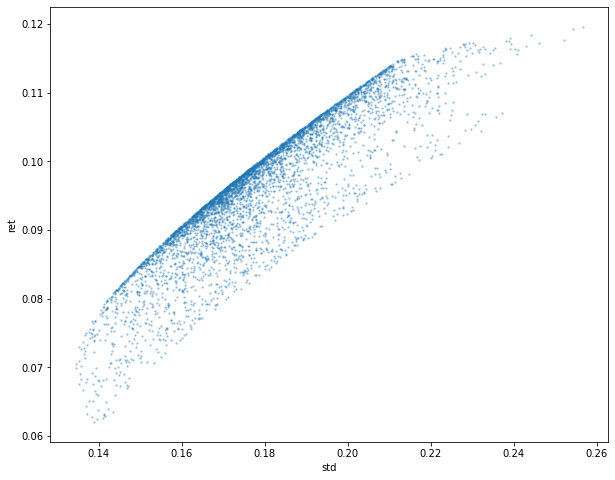

In [153]:
result.plot.scatter("std","ret", alpha=0.3,s=2,figsize=(10,8))

In [19]:
import yfinance as yf

In [77]:
#df1 = yf.download(['AAPL', 'NKE', 'GOOGL', 'AMZN'], start='2015-01-01', end='2019-12-31')

[*********************100%***********************]  4 of 4 completed


In [155]:
df_test = pd.read_csv("diff_clean_all.csv",header=[0,1], index_col=[0], parse_dates=True)


In [181]:
pf_components = [("Equity","CSPX.L"), ("Equity","CJPU.L"),("Equity","CECD.LN"),("Real Estate","IPRP.AS")]
df1 = df_test[pf_components].copy()

In [182]:
df1.columns = df1.columns.droplevel(0)

In [183]:
df1.index

DatetimeIndex(['2016-07-01', '2016-07-04', '2016-07-05', '2016-07-06',
               '2016-07-07', '2016-07-08', '2016-07-11', '2016-07-12',
               '2016-07-13', '2016-07-14',
               ...
               '2021-06-17', '2021-06-18', '2021-06-21', '2021-06-22',
               '2021-06-23', '2021-06-24', '2021-06-25', '2021-06-28',
               '2021-06-29', '2021-06-30'],
              dtype='datetime64[ns]', name='Date', length=1281, freq=None)

In [184]:
df1.head()

,CSPX.L,CJPU.L,CECD.LN,IPRP.AS
Date,,,,
2016-07-01,0.010468,-0.006062,-0.006000,0.006613
2016-07-04,0.000507,0.007559,-0.003696,-0.001577
2016-07-05,-0.008253,0.000000,-0.015147,-0.014607
2016-07-06,0.000000,-0.016199,-0.008788,-0.014957
2016-07-07,0.006458,0.000000,0.012666,0.002440


In [185]:
cov_matrix = df1.apply(lambda x: np.log(1+x)).cov()
cov_matrix

,CSPX.L,CJPU.L,CECD.LN,IPRP.AS
CSPX.L,0.000104,0.000077,0.000093,0.000062
CJPU.L,0.000077,0.000098,0.000088,0.000055
CECD.LN,0.000093,0.000088,0.000194,0.000071
IPRP.AS,0.000062,0.000055,0.000071,0.000113


In [186]:
cor_matrix = df1.apply(lambda x: np.log(1+x)).corr()
cor_matrix

,CSPX.L,CJPU.L,CECD.LN,IPRP.AS
CSPX.L,1.000000,0.762369,0.653128,0.572490
CJPU.L,0.762369,1.000000,0.639705,0.520598
CECD.LN,0.653128,0.639705,1.000000,0.482067
IPRP.AS,0.572490,0.520598,0.482067,1.000000


In [187]:
w = np.full(len(df1.columns),1/len(df1.columns))
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
w,port_var

(array([0.25, 0.25, 0.25, 0.25]), 8.769059598945594e-05)

In [188]:
# Yearly returns for individual companies
ind_er = df1.mean() * 250
ind_er

CSPX.L     0.171378
CJPU.L     0.102922
CECD.LN    0.094227
IPRP.AS    0.035935
dtype: float64

In [189]:
#w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er


0.10111539149691923

In [190]:
ann_sd = df1.apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

CSPX.L     0.161563
CJPU.L     0.156380
CECD.LN    0.220318
IPRP.AS    0.168249
dtype: float64

In [191]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
CSPX.L,0.171378,0.161563
CJPU.L,0.102922,0.156380
CECD.LN,0.094227,0.220318
IPRP.AS,0.035935,0.168249


In [197]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df1.columns)
num_portfolios = 10000

In [198]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [199]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [200]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,return weight,var weight
0,0.100970,0.148247,0.359930,0.057209
1,0.093815,0.173864,0.058579,0.235901
2,0.062723,0.158187,0.037543,0.031130
3,0.094743,0.175253,0.125047,0.098271
4,0.091391,0.150145,0.112078,0.344160


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

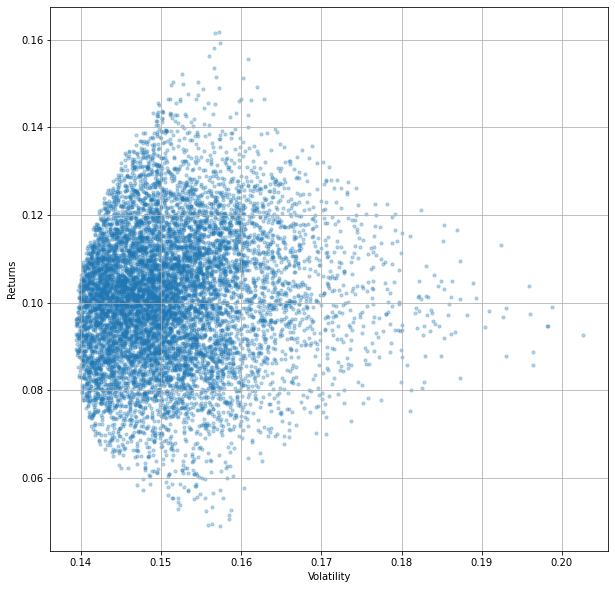

In [201]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])